In [2]:
# prompt: get a kaggle data set

!pip install kaggle

# You will need to upload your kaggle.json file to the colab environment.
# The kaggle.json file contains your Kaggle API credentials.
# You can find it in your Kaggle account settings.
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Replace 'username/dataset-name' with the actual dataset name
!kaggle datasets download -d uciml/sms-spam-collection-dataset

# Unzip the downloaded data (if it's a zip file)



Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
unzip:  cannot find or open uciml/sms-spam-collection-dataset.zip, uciml/sms-spam-collection-dataset.zip.zip or uciml/sms-spam-collection-dataset.zip.ZIP.


In [6]:

import pandas as pd
import numpy as np

df=pd.read_csv('sms-spam/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

#1. Data Clean
#2. EDA
#3. Text Prprocessing
#4. Model Building
#5. Evaluation
#6. Evaluation
#7. Improvement

#1. Data Cleaning


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(10)

,v1,v2
4542,ham,I've been trying to reach him without success
4800,ham,The guy at the car shop who was flirting with ...
407,ham,Hello! Good week? Fancy a drink or something l...
2714,ham,I am thinking of going down to reg for pract l...
785,ham,"She was supposed to be but couldn't make it, s..."
2048,ham,So dont use hook up any how
4780,ham,Yup... Hey then one day on fri we can ask miwa...
338,ham,"Sorry, I'll call later"
1962,spam,it to 80488. Your 500 free text messages are v...
2148,ham,I will once i get home


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
1976,ham,Lol alright i was thinkin that too haha
4762,ham,Prepare to be pleasured :)
1049,spam,18 days to Euro2004 kickoff! U will be kept in...
3068,ham,Ay wana meet on sat?Ì_ wkg on sat?
4936,ham,G wants to know where the fuck you are
3503,ham,Will you be here for food
3420,spam,Welcome! Please reply with your AGE and GENDER...
879,spam,U have a Secret Admirer who is looking 2 make ...
1000,ham,No..but heard abt tat..
3870,ham,Yeah my usual guy's out of town but there're d...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.sample(10)

,target,text
1016,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
399,0,Hmmm...k...but i want to change the field quic...
3426,0,Haha okay... Today weekend leh...
4235,1,U can WIN å£100 of Music Gift Vouchers every w...
4124,0,May b approve panalam...but it should have mor...
3322,0,"She said,'' do u mind if I go into the bedroom..."
1700,0,Please ask mummy to call father
561,0,Thanx 4 e brownie it's v nice...
2261,0,Did you show him and wot did he say or could u...
981,0,Reckon need to be in town by eightish to walk ...


In [14]:
df.isnull().sum()

,0
target,0
text,0


In [17]:
df.duplicated().sum()

np.int64(403)

In [19]:
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

#2 EDA

In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


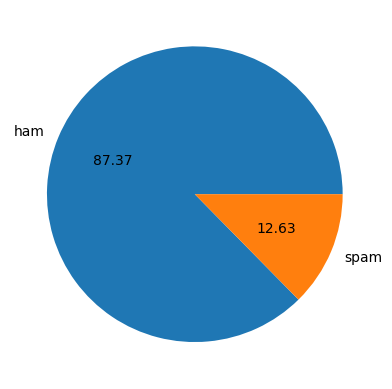

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

making columns for character count, words  count and sentence count

In [22]:
import nltk

In [24]:
df['char_count']=df['text'].apply(len)
df.head()

<ipython-input-24-435180011e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count']=df['text'].apply(len)


,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
nltk.download('punkt_tab')
df['count_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [32]:
df.head()

,target,text,char_count,count_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['count_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,char_count,count_words,count_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['char_count','count_words','count_sent']].describe()

,char_count,count_words,count_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target']==0][['char_count','count_words','count_sent']].describe()

,char_count,count_words,count_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==1][['char_count','count_words','count_sent']].describe()

,char_count,count_words,count_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

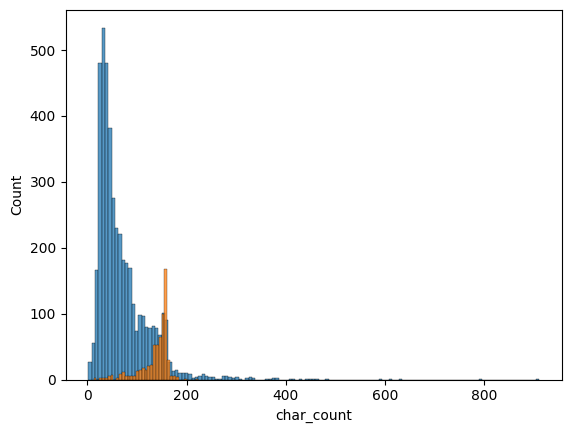

In [40]:
import seaborn as sns
sns.histplot(df[df['target']==0]['char_count'])
sns.histplot(df[df['target']==1]['char_count'])

<Axes: xlabel='count_words', ylabel='Count'>

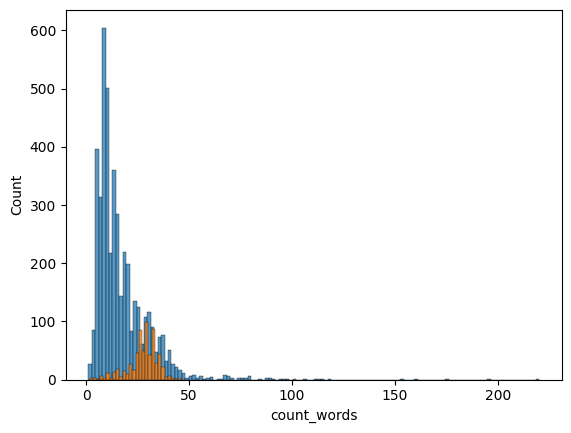

In [41]:
sns.histplot(df[df['target']==0]['count_words'])
sns.histplot(df[df['target']==1]['count_words'])

<Axes: xlabel='count_sent', ylabel='Count'>

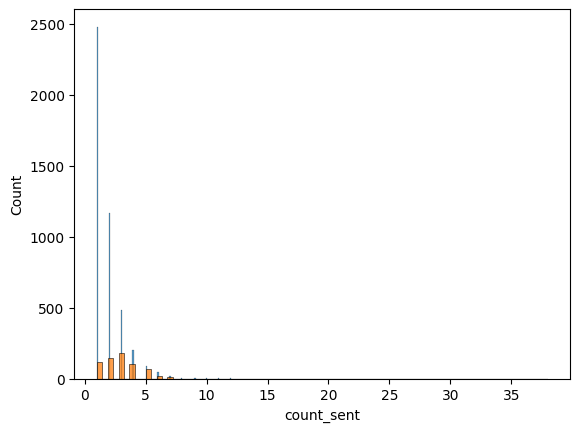

In [43]:
sns.histplot(df[df['target']==0]['count_sent'])
sns.histplot(df[df['target']==1]['count_sent'])

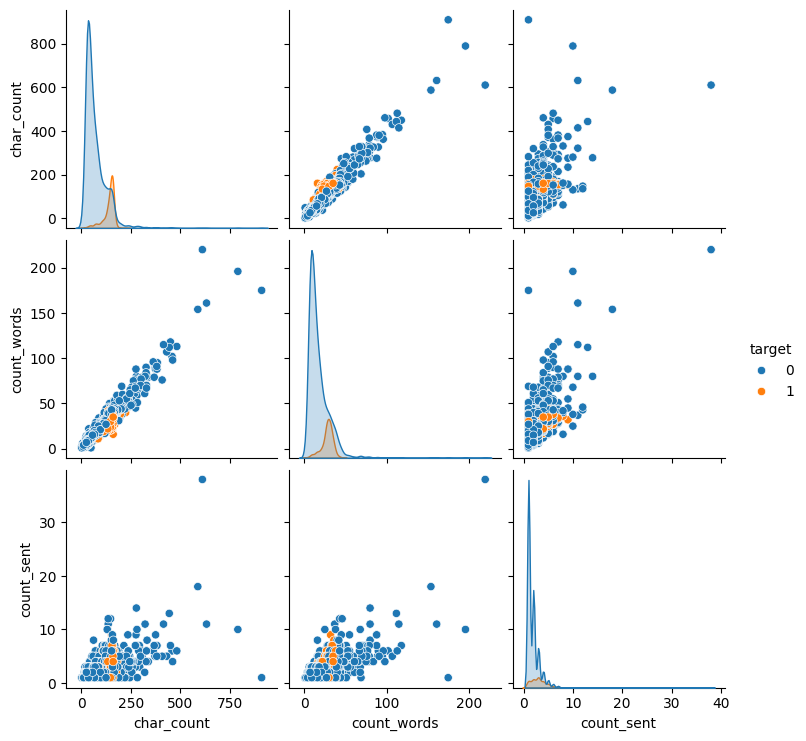

In [44]:
sns.pairplot(df,hue='target')

<Axes: >

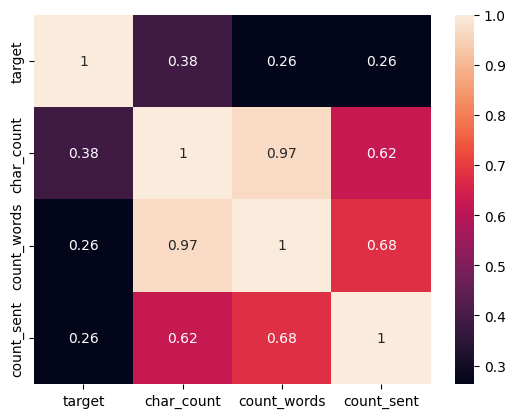

In [48]:
# Calculate the correlation matrix only for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Generate the heatmap using the correlation matrix of numerical features
sns.heatmap(correlation_matrix, annot=True)

3. Test Preprocessing

In [49]:
df.head()

,target,text,char_count,count_words,count_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
# prompt: change text column in df to lower case, tokenize, remove special characters, remove stopwords and punctuation and then apply stemming

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

import string
df['transformed_text'] = df['text'].apply(transform_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
df.head()

,target,text,char_count,count_words,count_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [58]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

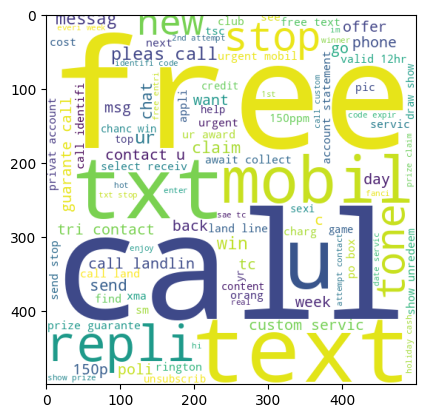

In [59]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

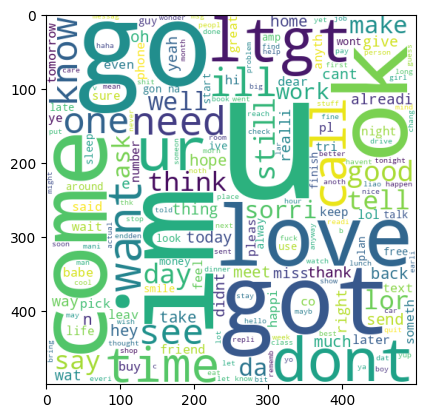

In [60]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [61]:
df.head()

,target,text,char_count,count_words,count_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [67]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', '150', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', '20000', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '150pday', '6day', '16', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', '100000', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'tc', 'wwwdbuknet', 'lccltd', 'pobox', '4403ldnw1a7rw18', 

In [68]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)
print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'im', 'gon', 'na', 'home', 'soon', 'dont', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'ive', 'cri', 'enough', 'today', 'ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'kim', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'that', 'way', 'u', 'feel', 'that', 'way', 'gota', 'b', 'serious', 'spell',

<ipython-input-79-6b1ace16c66a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=spam_corpus_df, palette=palette)


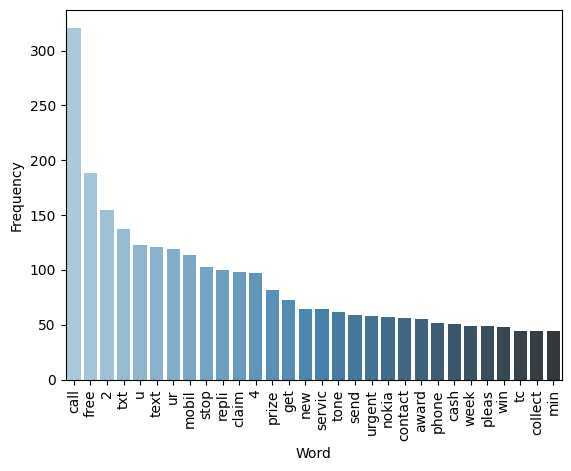

In [79]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the most common words in spam_corpus
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create a color palette with a gradient
palette = sns.color_palette("Blues_d", n_colors=len(spam_corpus_df))

# Use the 'Word' column for the x-axis, 'Frequency' for the y-axis,
# and the generated palette for the color gradient
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df, palette=palette)

plt.xticks(rotation='vertical')
plt.show()

<ipython-input-80-12b6d6fb4f44>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=ham_corpus_df, palette=palette)


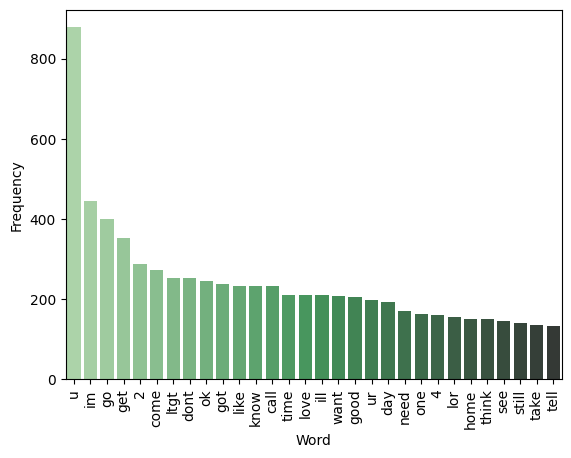

In [80]:
# prompt: make similar plot for ham_corpus

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame from the most common words in ham_corpus
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create a color palette with a gradient
palette = sns.color_palette("Greens_d", n_colors=len(ham_corpus_df))

# Use the 'Word' column for the x-axis, 'Frequency' for the y-axis,
# and the generated palette for the color gradient
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df, palette=palette)

plt.xticks(rotation='vertical')
plt.show()


# 4. Model Building Naive Bayes

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()

In [84]:
x=cv.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 7979)

In [86]:
y=df['target'].values

In [87]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8810444874274661
[[790 106]
 [ 17 121]]
0.5330396475770925


In [94]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[871  25]
 [ 11 127]]
0.8355263157894737


In [95]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[894   2]
 [ 28 110]]
0.9821428571428571


In [97]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 7979)

In [104]:
Y=df['target'].values
X_train,X_test,Y_train,Y_test= tts(X,Y,test_size=0.2,random_state=2)

In [105]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[790 106]
 [ 22 116]]
0.5225225225225225


In [106]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9564796905222437
[[896   0]
 [ 45  93]]
1.0


In [107]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9709864603481625
[[894   2]
 [ 28 110]]
0.9821428571428571


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [109]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [110]:
clfs={'SVC':svc,'KN':knc,'NB':mnb,'DT':dtc,'LR':lrc,'RF':rfc,'AB':abc,'BC':bc,'ETC':etc,'GBDT':gbdt,'XGB':xgb}

In [111]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred)

  return accuracy,precision



In [113]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.971953578336557
SVC precision is 0.9739130434782609
KN accuracy is 0.8965183752417795
KN precision is 1.0
NB accuracy is 0.9564796905222437
NB precision is 1.0
DT accuracy is 0.9381044487427466
DT precision is 0.8627450980392157
LR accuracy is 0.9526112185686654
LR precision is 0.9405940594059405
RF accuracy is 0.9709864603481625
RF precision is 0.990909090909091
AB accuracy is 0.9332688588007737
AB precision is 0.8876404494382022
BC accuracy is 0.9622823984526112
BC precision is 0.889763779527559
ETC accuracy is 0.9709864603481625
ETC precision is 0.9736842105263158
GBDT accuracy is 0.9584139264990329
GBDT precision is 0.9357798165137615
XGB accuracy is 0.971953578336557
XGB precision is 0.936


In [119]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
0,SVC,0.971954,0.973913
10,XGB,0.971954,0.936000
5,RF,0.970986,0.990909
8,ETC,0.970986,0.973684
7,BC,0.962282,0.889764
9,GBDT,0.958414,0.935780
2,NB,0.956480,1.000000
4,LR,0.952611,0.940594
3,DT,0.938104,0.862745
6,AB,0.933269,0.887640


In [120]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.956480,1.000000
5,RF,0.970986,0.990909
0,SVC,0.971954,0.973913
8,ETC,0.970986,0.973684
4,LR,0.952611,0.940594
10,XGB,0.971954,0.936000
9,GBDT,0.958414,0.935780
7,BC,0.962282,0.889764
6,AB,0.933269,0.887640


In [121]:
performance_df1=pd.melt(performance_df,id_vars=['Algorithm'])
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,NB,Accuracy,0.956480
2,RF,Accuracy,0.970986
3,SVC,Accuracy,0.971954
4,ETC,Accuracy,0.970986
5,LR,Accuracy,0.952611
6,XGB,Accuracy,0.971954
7,GBDT,Accuracy,0.958414
8,BC,Accuracy,0.962282
9,AB,Accuracy,0.933269


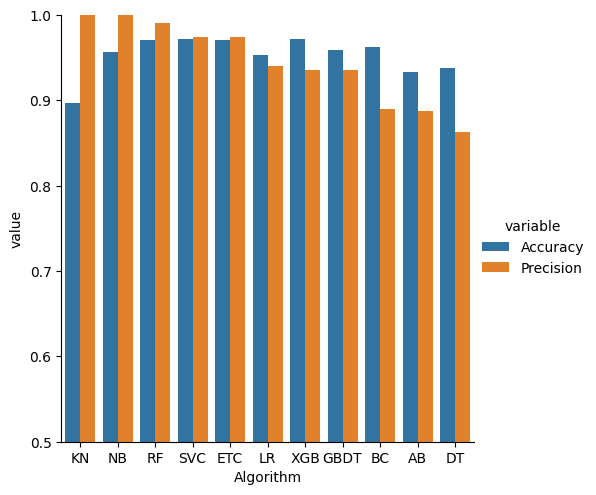

In [133]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.show()

Model Improvemnt

0.8733075435203095
[[784 112]
 [ 19 119]]
0.5151515151515151
0.9748549323017408
[[896   0]
 [ 26 112]]
1.0
0.9825918762088974
[[896   0]
 [ 18 120]]
1.0
SVC accuracy is 0.9738878143133463
SVC precision is 0.9663865546218487
KN accuracy is 0.9032882011605415
KN precision is 1.0
NB accuracy is 0.9748549323017408
NB precision is 1.0
DT accuracy is 0.937137330754352
DT precision is 0.8348623853211009
LR accuracy is 0.9535783365570599
LR precision is 0.9326923076923077
RF accuracy is 0.9748549323017408
RF precision is 0.9745762711864406
AB accuracy is 0.9226305609284333
AB precision is 0.8222222222222222
BC accuracy is 0.960348162475822
BC precision is 0.8818897637795275
ETC accuracy is 0.9777562862669246
ETC precision is 0.967479674796748
GBDT accuracy is 0.9516441005802708
GBDT precision is 0.9313725490196079
XGB accuracy is 0.9671179883945842
XGB precision is 0.940677966101695


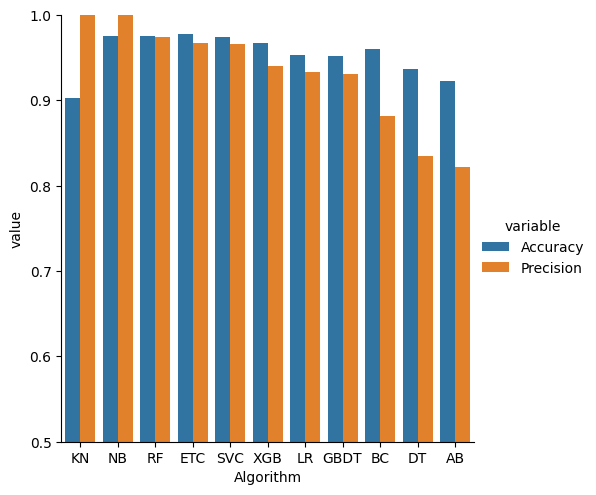

In [137]:
# prompt: Copy all lines after tfidf=TfidfVectorizer()

tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape
Y=df['target'].values
X_train,X_test,Y_train,Y_test= tts(X,Y,test_size=0.2,random_state=2)
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

clfs={'SVC':svc,'KN':knc,'NB':mnb,'DT':dtc,'LR':lrc,'RF':rfc,'AB':abc,'BC':bc,'ETC':etc,'GBDT':gbdt,'XGB':xgb}
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred)

  return accuracy,precision


accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df
performance_df1=pd.melt(performance_df,id_vars=['Algorithm'])
performance_df1
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.show()
# Model Improvemnt


0.9003868471953579
[[810  86]
 [ 17 121]]
0.5845410628019324
0.9448742746615088
[[896   0]
 [ 57  81]]
1.0
0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC accuracy is 0.8665377176015474
SVC precision is 0.0
KN accuracy is 0.9323017408123792
KN precision is 0.8148148148148148
NB accuracy is 0.9448742746615088
NB precision is 1.0
DT accuracy is 0.9497098646034816
DT precision is 0.9056603773584906
LR accuracy is 0.9584139264990329
LR precision is 0.9357798165137615
RF accuracy is 0.9758220502901354
RF precision is 0.991304347826087
AB accuracy is 0.9448742746615088
AB precision is 0.9263157894736842
BC accuracy is 0.9680851063829787
BC precision is 0.92
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
GBDT accuracy is 0.9545454545454546
GBDT precision is 0.941747572815534
XGB accuracy is 0.9709864603481625
XGB precision is 0.9576271186440678


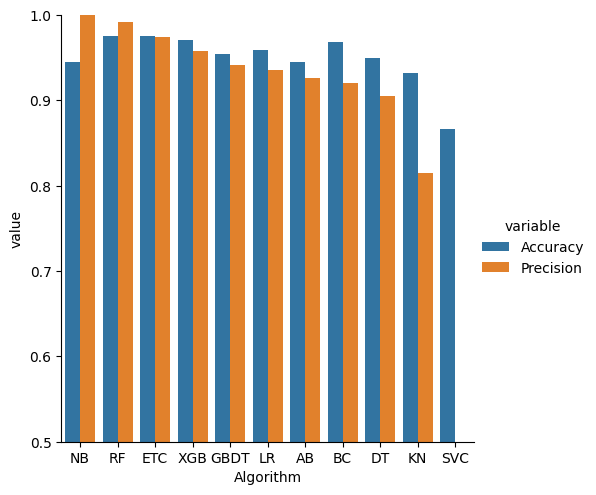

In [136]:
# prompt: Copy all lines after tfidf=TfidfVectorizer()

tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X=np.hstack((X,df['char_count'].values.reshape(-1,1)))
X.shape
Y=df['target'].values
X_train,X_test,Y_train,Y_test= tts(X,Y,test_size=0.2,random_state=2)
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

clfs={'SVC':svc,'KN':knc,'NB':mnb,'DT':dtc,'LR':lrc,'RF':rfc,'AB':abc,'BC':bc,'ETC':etc,'GBDT':gbdt,'XGB':xgb}
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred)

  return accuracy,precision


accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df
performance_df1=pd.melt(performance_df,id_vars=['Algorithm'])
performance_df1
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.show()
# Model Improvemnt


In [139]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

Utilizing model in any way you want

In [141]:
tfdif=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('model.pkl','rb'))
input_sms=input("Enter the message: ")

transformed_sms=transform_text(input_sms)
vector_input=tfidf.transform([transformed_sms])
result=model.predict(vector_input)[0]
if result==1:
  print('Spam')
else:
  print('Not Spam')




Enter the message: Hi, free call to new services
Spam
